<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

Ссылка на репозиторий для код-ревьюера: https://github.com/MariLarionova/origin

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import (
    f1_score, 
    roc_curve, 
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score
)


In [65]:
# Откроем наши DataFrame и результат выведем на экран 
df=pd.read_csv(r"D:\GitHab\first_project\Churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
    
Выводы: 
    1. В данном датасете 13 признаков, целевой признак, 10000 строк
    
    2. Признаки:
    - wNumber — индекс строки в данных (int64)
    - CustomerId — уникальный идентификатор клиента (int64)
    - Surname — фамилия (object)
    - CreditScore — кредитный рейтинг (int64)
    - Geography — страна проживания (object)
    - Gender — пол (object)
    - Age — возраст (int64)
    - Tenure — количество недвижимости у клиента (float64)
    - Balance — баланс на счёте (float64)
    -NumOfProducts — количество продуктов банка, используемых клиентом (int64) 
    - HasCrCard — наличие кредитной карты (int64)
    - IsActiveMember — активность клиента (int64)
    - EstimatedSalary — предполагаемая зарплата (float64)
    
    3. Целевой признак:
    - Exited — факт ухода клиента (int64)
    
    4. В данных присутствуют столбцы, которые не нужны. Их можно удалить. В анализе они не нужны. Также есть пропуски в значении недвижимости. Это означает, что у клиента нет ее. Значит можно просто заменить 0 и перевести в целочисленный тип.
   
</div>  

In [67]:
# Удаляем лишние столбцы
del_col=['RowNumber','EstimatedSalary','CustomerId','Surname']
df=df.drop(del_col,axis=1)

In [68]:
# Заполняем пропуски нулевыми данными - 0
#df['Tenure']=df['Tenure'].fillna(0).astype('int64')


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          9091 non-null   float64
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCrCard       10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
 9   Exited          10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [70]:
df['Tenure'].fillna(df['Tenure'].median(), inplace = True)

In [71]:
# Отобразим изменения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  float64
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCrCard       10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
 9   Exited          10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [72]:
df['Tenure'].astype('int64')

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     5
Name: Tenure, Length: 10000, dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  float64
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCrCard       10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
 9   Exited          10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,0
2,502,France,Female,42,8.0,159660.80,3,1,0,1
3,699,France,Female,39,1.0,0.00,2,0,0,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,0


## Исследование задачи

<Axes: title={'center': 'Соотношение тех, кто остался и тех кто ушел'}>

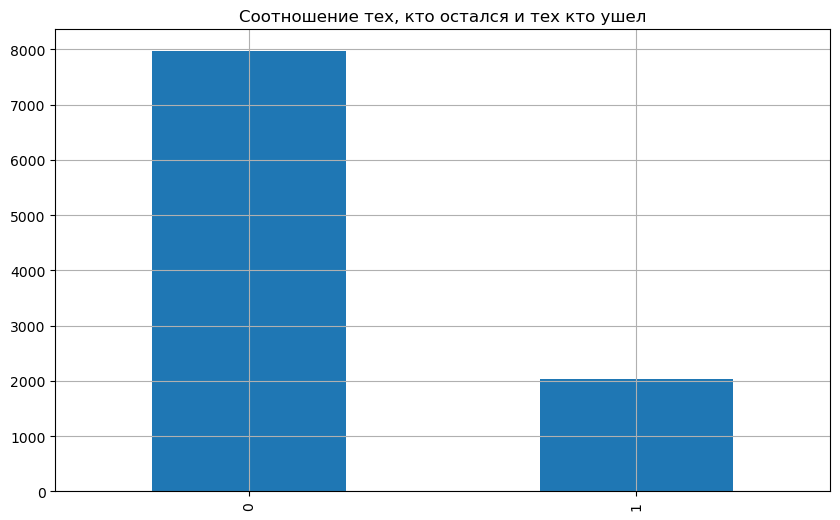

In [75]:
# Рисуем гистограмму значений оттока и оставшихся клиентов
df['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(10,6),title='Соотношение тех, кто остался и тех кто ушел')

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
    
Соотношение оттока и тех кто остался 1:4. 
Вывод: такое соотношение говорит, что присутствует дисбаланс в данных. Попробуем оценить зависимость возраста и оттока клиентв.
</div>  

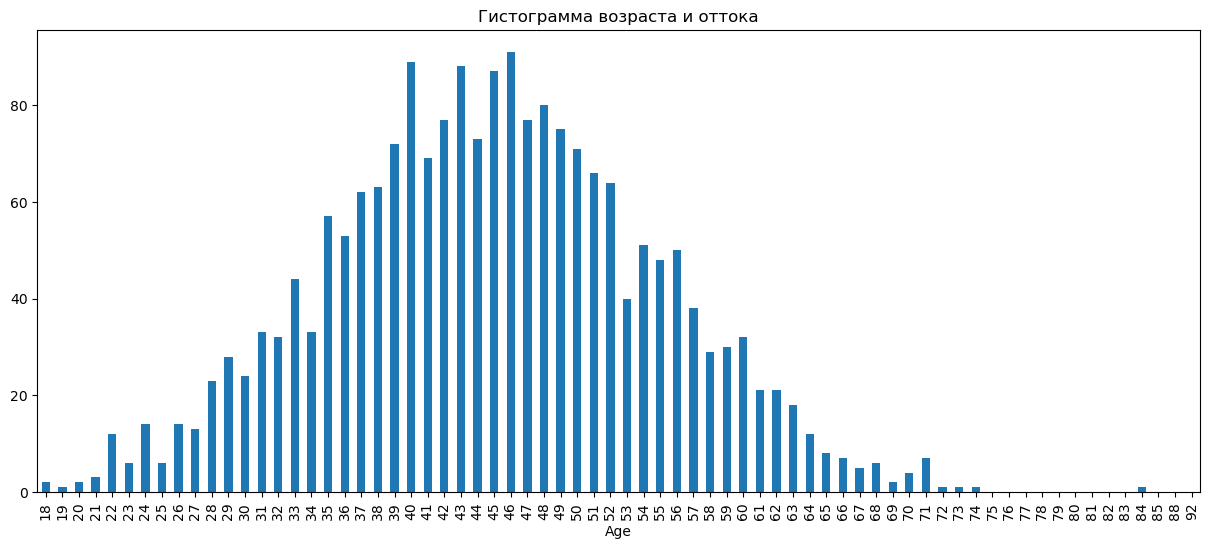

In [76]:
# Посмотрим как зависит возраст и отток клиентов 
df.groupby('Age')['Exited'].sum().plot(figsize=(15,6),kind='bar',title='Гистограмма возраста и оттока')
plt.show()

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
    
По гистограмме распределения видно, что есть связь между оттоком и возрастом. Распределение нормально. Больше всего уходит клиентов в возрасте от 40 до 46 лет.
</div> 

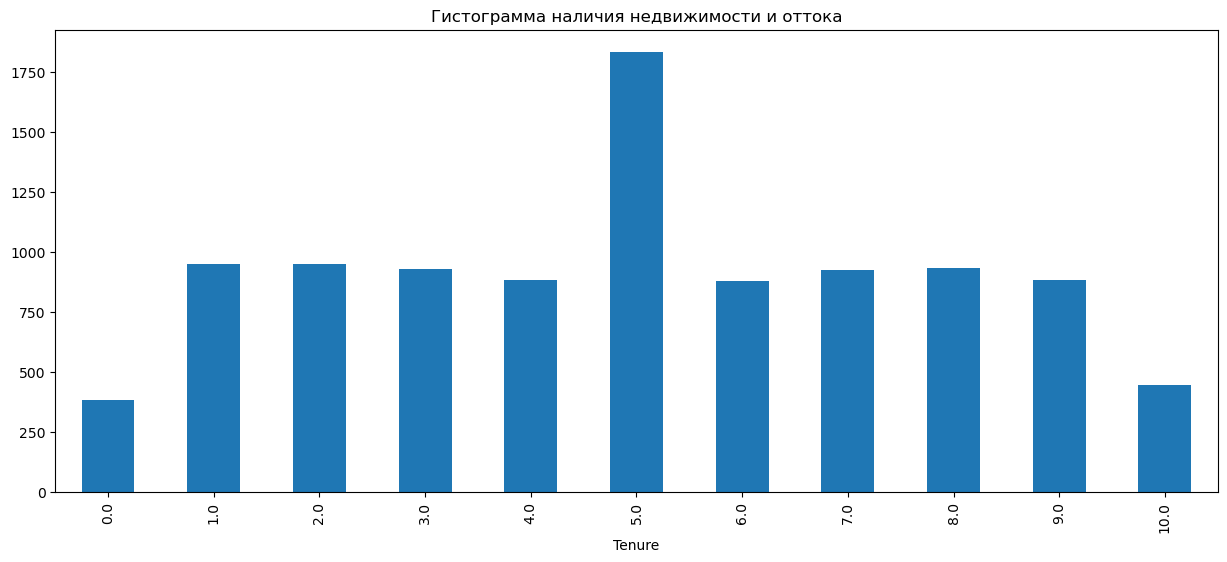

In [77]:
# Посмотрим как зависит наличие недвижимости и отток клиентов
df.groupby('Tenure')['Exited'].count().plot(figsize=(15,6),kind='bar',title='Гистограмма наличия недвижимости и оттока')
plt.show()

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
    
На этой гисторгамме не видна явно выраженная зависимость, но можно увидеть, что те у кого нет недвижимости уходят чаще.
</div> 

<Axes: title={'center': 'Гистограмма медианного баланса денег у тех кто ушел и тех кто остался'}, xlabel='Exited'>

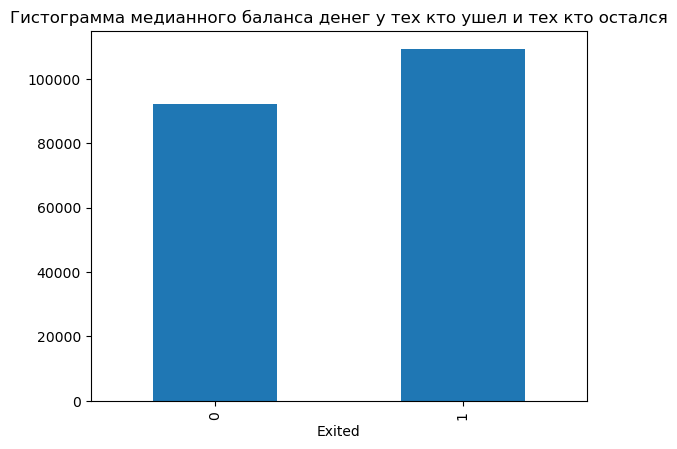

In [78]:
# Построим еще одну гистограмму, чтобы посмотреть 
# медиану баланса денег у тех кто ушел и тех кто остался
df.groupby('Exited')['Balance'].median().plot(kind
                                              ='bar',title
                                              ='Гистограмма медианного баланса денег у тех кто ушел и тех кто остался')

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
На гистограмме видно, что зависимость слабая, но среднее значение баланса немного выше у тех кто ушел   
</div>


In [79]:
#Посчитаем корреляцию Пирсона
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CreditScore,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.027094
Age,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,0.285323
Tenure,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,-0.015989
Balance,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.118533
NumOfProducts,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.156128
Exited,-0.027094,0.285323,-0.015989,0.118533,-0.047820,-0.007138,-0.156128,1.000000


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Видно, что все признаки слабо коррелируются с целевым признаком. Скорее всего в данных прослеживается более сложная зависимость 
</div>


In [80]:
# Избавляемся от категориальных признаков методом One hot encoder.
# Вызываем метод get_dummies для избавления от категориальных признаков
df_ohe=pd.get_dummies(df,drop_first=True)

In [81]:
# Целевой признак
target=df_ohe['Exited']

In [82]:
# Признаки
features=df_ohe.drop(['Exited'],axis=1)

In [83]:
#Разбиваем данные после OHE на следующие выборки 
#train_features,valid_features,train_target,valid_target=train_test_split(features,target,test_size=0.25,random_state=1234)


In [84]:
features = df_ohe.drop(['Exited'], axis=1)
target = df_ohe['Exited']

features_temp, test_features, target_temp, test_target = train_test_split(features, target, test_size=0.2, random_state=12345)
train_features, valid_features, train_target, valid_target = train_test_split(features_temp, target_temp, test_size=0.25, random_state=12345)

In [85]:
# Стандартизируем тестовую и валидную выборку, 
# т.к есть значения и маленькие и очень большие
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']
scaler=StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric]=scaler.transform(train_features[numeric])
valid_features[numeric]=scaler.transform(valid_features[numeric])
test_features[numeric]=scaler.transform(test_features[numeric])

In [86]:
# код ревьюера (вот так)
import warnings
warnings.filterwarnings('ignore')

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Метод Original encoder не принес хорошего результата, поэтому представлен в виде комментария, который впоследствии удалила. См. коммент. ниже.
</div>

In [87]:
# Построим модель без учета баланса
# 1. Обучение с помощью модели Дерево решения
# Поищем циклом лучший гиперпораметр max_depth
for depth in range(1,25,1):
    model_tree=DecisionTreeClassifier(max_depth=depth,random_state=1234).fit(train_features,train_target)
    prediction=model_tree.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.5037037037037037
max_depth: 3 F1: 0.39382239382239387
max_depth: 4 F1: 0.430188679245283
max_depth: 5 F1: 0.5465838509316769
max_depth: 6 F1: 0.5078260869565216
max_depth: 7 F1: 0.555205047318612
max_depth: 8 F1: 0.5496894409937887
max_depth: 9 F1: 0.543778801843318
max_depth: 10 F1: 0.5387994143484626
max_depth: 11 F1: 0.5362962962962964
max_depth: 12 F1: 0.5192582025677603
max_depth: 13 F1: 0.5108695652173912
max_depth: 14 F1: 0.5143603133159269
max_depth: 15 F1: 0.5235602094240838
max_depth: 16 F1: 0.5179282868525895
max_depth: 17 F1: 0.5083440308087293
max_depth: 18 F1: 0.5019011406844106
max_depth: 19 F1: 0.505
max_depth: 20 F1: 0.4875621890547263
max_depth: 21 F1: 0.48470012239902077
max_depth: 22 F1: 0.4877450980392157
max_depth: 23 F1: 0.48462484624846247
max_depth: 24 F1: 0.4864864864864865


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Лучшее значение max_depth=7, при котором F1=0,555
</div>

In [130]:
# 2. Обучение с помощью модели Случайный лес
# Поищем циклом лучший гиперпораметр max_depth
for max_depth in range(1,30,1):
    model_forest=RandomForestClassifier(max_depth=max_depth,n_estimators=50,random_state=1234).fit(train_features,train_target)
    prediction=model_forest.predict(valid_features)
    print('max_depth:',max_depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.02525252525252525
max_depth: 2 F1: 0.21315192743764172
max_depth: 3 F1: 0.3443983402489626
max_depth: 4 F1: 0.3614457831325301
max_depth: 5 F1: 0.4326375711574953
max_depth: 6 F1: 0.5189003436426117
max_depth: 7 F1: 0.524701873935264
max_depth: 8 F1: 0.5460526315789473
max_depth: 9 F1: 0.5436573311367381
max_depth: 10 F1: 0.5481239804241436
max_depth: 11 F1: 0.5407166123778502
max_depth: 12 F1: 0.5632
max_depth: 13 F1: 0.5777080062794349
max_depth: 14 F1: 0.5539452495974235
max_depth: 15 F1: 0.5644171779141104
max_depth: 16 F1: 0.563467492260062
max_depth: 17 F1: 0.5656877897990726
max_depth: 18 F1: 0.5588697017268446
max_depth: 19 F1: 0.5834633385335413
max_depth: 20 F1: 0.5696594427244581
max_depth: 21 F1: 0.567398119122257
max_depth: 22 F1: 0.5599999999999999
max_depth: 23 F1: 0.5569230769230769
max_depth: 24 F1: 0.5603715170278637
max_depth: 25 F1: 0.5599999999999999
max_depth: 26 F1: 0.5758513931888545
max_depth: 27 F1: 0.5727554179566563
max_depth: 28 F1: 0.572

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Лучшее значение max_depth=19, при котором F1=0,583
</div>

In [89]:
# Циклом подбираем гиперпораметр n_estimators (количество деревьев)
for estim in range(1,55,2):
    model_forest=RandomForestClassifier(max_depth=19,n_estimators=estim,random_state=1234).fit(train_features,train_target)
    prediction=model_forest.predict(valid_features)
    print('estim',estim,'F1:',f1_score(valid_target,prediction))
    
    

estim 1 F1: 0.45268542199488493
estim 3 F1: 0.502127659574468
estim 5 F1: 0.5178571428571429
estim 7 F1: 0.5443609022556392
estim 9 F1: 0.5586924219910847
estim 11 F1: 0.5498489425981873
estim 13 F1: 0.5501519756838906
estim 15 F1: 0.5614567526555386
estim 17 F1: 0.5586419753086419
estim 19 F1: 0.5674846625766872
estim 21 F1: 0.5639445300462249
estim 23 F1: 0.5618320610687023
estim 25 F1: 0.5696784073506892
estim 27 F1: 0.5718654434250764
estim 29 F1: 0.5866261398176292
estim 31 F1: 0.5788667687595712
estim 33 F1: 0.5878787878787879
estim 35 F1: 0.5797546012269938
estim 37 F1: 0.5815384615384616
estim 39 F1: 0.5771604938271605
estim 41 F1: 0.5833333333333334
estim 43 F1: 0.5824345146379045
estim 45 F1: 0.5855161787365177
estim 47 F1: 0.5846153846153846
estim 49 F1: 0.588597842835131
estim 51 F1: 0.5811437403400309
estim 53 F1: 0.586046511627907


In [90]:
#for estim in range(1, 25, 1):
    #for depth in range(1, 50, 2):
        #model = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth)
        #prediction=model_forest.predict(valid_features)
        #print('max_depth:',max_depth, 'estim:', estim, 'F1:',f1_score(valid_target,prediction) 
    

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Лучшее значение max_depth=19 и n_estimators=49, при котором F1=0,589. Наблюдаем отрицательную динамику
</div>

In [91]:
#Обучение с помощью модели Логистической регрессии
model_logistic=LogisticRegression().fit(train_features,train_target)
prediction=model_logistic.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.30018761726078796


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Вывод:
Рассматривая данные с дисбалансом (но, с переведенными категориальными и стандартизированными данными) тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес. При лучшем значении max_depth=19, мы имеем F1=0,583 на тестовой(валидной) выборке. Самый плохой результат показала модель Логистическая регрессия с F1=0.300.
</div>


In [92]:
# Исследуем метрику AUC-RC
# Рисуем ROC для логистической регресси
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

In [93]:
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

In [94]:
auc_roc_tree

0.6842242882507126

In [95]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)

In [96]:
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)

In [34]:
auc_roc_forest

0.8392561661625225

In [35]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)

In [36]:
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)

In [37]:
auc_roc_reg

0.770498109260728

<Figure size 640x480 with 0 Axes>

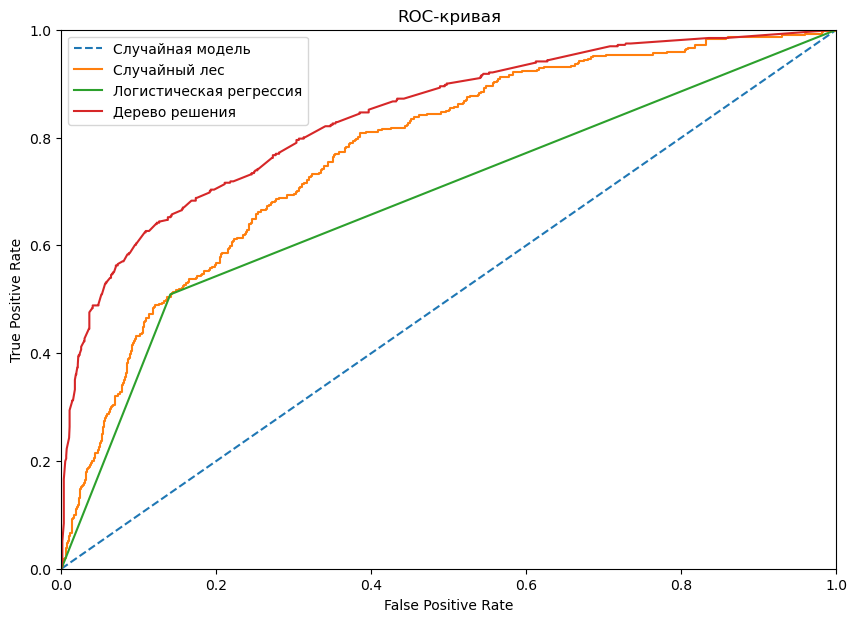

In [97]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Значение площади под кривой. На сколько наша модель отличается от случайной.
Лучшее значение метрики auc roc=0.839 у модели Дерево решений

</div>

## Борьба с дисбалансом

In [98]:
# Воспользуемся функцией Upsampling 
# и увеличим количество клиентов оттока(target==1)
def upsampling (features,target,repeat):
    #Разделяем выборку по значениям целевой функции
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    #Увеличиваем и соединяем обратно
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    # Перемешиваем
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=1234)
    
    return upsampling_features,upsampling_target

In [99]:
features_balance_up,target_balance_up=upsampling(train_features,train_target,4)

In [100]:
# Воспользуемся функцией Downsampling 
# и увеличим количество клиентов оттока(target==1)
def downsampling(features,target,fraction):
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    
    downsampling_features=pd.concat([features_null.sample(frac=0.4,random_state=1234)]+[features_one])
    downsampling_target=pd.concat([target_null.sample(frac=0.4,random_state=1234)]+[target_one])
    
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=1234)
    return downsampling_features,downsampling_target

In [101]:
#features_balance_up,target_balance_up=downsampling(features,target,0.4)

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Вывод: т.к количество данных невелико, исключаем метод уменьшения выборки (Downsampling). Используем Upsampling.
</div>


In [102]:
%%time 
# После балансирования данных 
# 1. Обучение с помощью модели Дерево решения
# Циклом ищем лучший гиперпораметр max_depth
for depth in range(1,20,1):
    model_tree=DecisionTreeClassifier(class_weight='balanced',max_depth=depth,random_state=1234).fit(features_balance_up,target_balance_up)
  
    prediction=model_tree.predict(valid_features)
    print('max_depth:',depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.4750733137829912
max_depth: 2 F1: 0.49761677788369874
max_depth: 3 F1: 0.49761677788369874
max_depth: 4 F1: 0.520112254443405
max_depth: 5 F1: 0.5504761904761906
max_depth: 6 F1: 0.5616161616161617
max_depth: 7 F1: 0.5534079348931842
max_depth: 8 F1: 0.5499999999999999
max_depth: 9 F1: 0.5259042033235581
max_depth: 10 F1: 0.5114427860696518
max_depth: 11 F1: 0.4973985431841832
max_depth: 12 F1: 0.4962566844919786
max_depth: 13 F1: 0.4865470852017937
max_depth: 14 F1: 0.49764150943396224
max_depth: 15 F1: 0.4903846153846154
max_depth: 16 F1: 0.49754901960784315
max_depth: 17 F1: 0.4957472660996355
max_depth: 18 F1: 0.4900497512437811
max_depth: 19 F1: 0.4829329962073325
CPU times: total: 1.81 s
Wall time: 3.13 s


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Лучшее значение после балансирования данных max_depth=6, при котором F1=0,561

</div>

In [103]:
%%time
# После балансирования данных
# 2. Обучение с помощью модели Случайный лес
# Циклом ищем лучший гиперпораметр max_depth
for max_depth in range(1,20,1):
    model_forest=RandomForestClassifier(class_weight='balanced',max_depth=max_depth,n_estimators=50,random_state=1234).fit(features_balance_up,target_balance_up)
    prediction=model_forest.predict(valid_features)
    print('max_depth:',max_depth,'F1:',f1_score(valid_target,prediction))

max_depth: 1 F1: 0.4990512333965844
max_depth: 2 F1: 0.527027027027027
max_depth: 3 F1: 0.5463709677419355
max_depth: 4 F1: 0.5452695829094608
max_depth: 5 F1: 0.5507246376811595
max_depth: 6 F1: 0.5744456177402323
max_depth: 7 F1: 0.5738045738045738
max_depth: 8 F1: 0.5781083953241233
max_depth: 9 F1: 0.586433260393873
max_depth: 10 F1: 0.5858585858585859
max_depth: 11 F1: 0.5941520467836257
max_depth: 12 F1: 0.5930372148859544
max_depth: 13 F1: 0.5958485958485958
max_depth: 14 F1: 0.5951468710089399
max_depth: 15 F1: 0.608355091383812
max_depth: 16 F1: 0.5916230366492147
max_depth: 17 F1: 0.601063829787234
max_depth: 18 F1: 0.5912806539509536
max_depth: 19 F1: 0.5910931174089069
CPU times: total: 24.3 s
Wall time: 39.8 s


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Лучшее значение max_depth=12, при котором F1=0,594

</div>

In [104]:
%%time
# Циклом подбираем гиперпораметр n_estimators (количество деревьев)
for estim in range(1,51,1):
    model_forest=RandomForestClassifier(class_weight='balanced',max_depth=12,n_estimators=estim,random_state=1234).fit(features_balance_up,target_balance_up)
    prediction=model_forest.predict(valid_features)
    print('estim',estim,'F1:',f1_score(valid_target,prediction))

estim 1 F1: 0.49789915966386555
estim 2 F1: 0.4970691676436108
estim 3 F1: 0.5634118967452302
estim 4 F1: 0.5504151838671413
estim 5 F1: 0.5700934579439252
estim 6 F1: 0.5687645687645687
estim 7 F1: 0.5674740484429066
estim 8 F1: 0.5641618497109827
estim 9 F1: 0.5701042873696407
estim 10 F1: 0.5799522673031027
estim 11 F1: 0.5738095238095237
estim 12 F1: 0.569047619047619
estim 13 F1: 0.5683962264150944
estim 14 F1: 0.5707434052757794
estim 15 F1: 0.5727923627684964
estim 16 F1: 0.5804111245465539
estim 17 F1: 0.5790754257907543
estim 18 F1: 0.5811138014527845
estim 19 F1: 0.5829268292682926
estim 20 F1: 0.5787545787545787
estim 21 F1: 0.5836385836385836
estim 22 F1: 0.5811965811965812
estim 23 F1: 0.5878048780487803
estim 24 F1: 0.5882352941176471
estim 25 F1: 0.5804878048780487
estim 26 F1: 0.584652862362972
estim 27 F1: 0.5818181818181818
estim 28 F1: 0.5779927448609432
estim 29 F1: 0.5849514563106796
estim 30 F1: 0.5797101449275364
estim 31 F1: 0.5793939393939395
estim 32 F1: 0.584

In [105]:
 model_forest=RandomForestClassifier(class_weight='balanced',max_depth=11,n_estimators=50,random_state=1234).fit(features_balance_up,target_balance_up)

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Лучшее значение max_depth=12 и n_estimators=24, при котором F1=0,601. Наблюдаем положительную динамику

</div>

In [106]:
%%time
# После балансирования данных
# 3. Обучение с помощью модели Логистической регрессии
model_logistic=LogisticRegression(class_weight='balanced',solver='liblinear').fit(features_balance_up,target_balance_up)
prediction=model_logistic.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.47864768683274017
CPU times: total: 62.5 ms
Wall time: 203 ms


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Показатель F1 вырос до 0.478

</div>


In [107]:
#Рисуем ROC
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

In [108]:
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

In [109]:
auc_roc_tree

0.679062307766893

In [110]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)

In [111]:
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)

In [112]:
auc_roc_forest

0.8533075618444206

In [113]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)

In [114]:
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)

In [115]:
auc_roc_reg

0.7729793568466379

<Figure size 640x480 with 0 Axes>

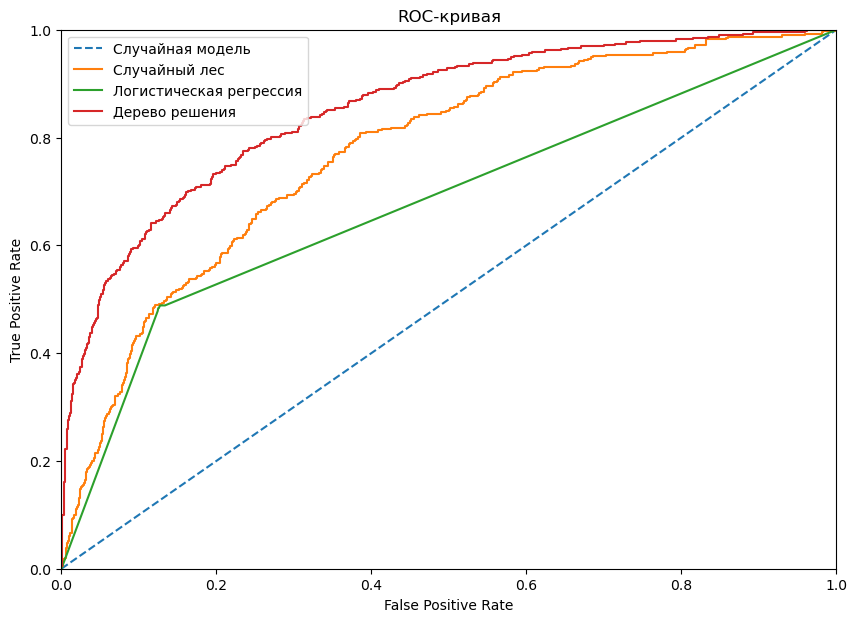

In [116]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Значение площади под кривой. На сколько наша модель отличается от случайной.
Лучшее значение метрики auc roc=0.852 у модели Дерево решения

</div>

In [117]:
rezult1={'Дерево Решения':np.array([0.555,0.561]),'Случайный лес':np.array([0.589,0.601]),'Логистическая регрессия':np.array([0.300,0.479])}
rezult_df=pd.DataFrame(rezult1,index=['F1 без учета дисбаланса','F1 с учетом дисбаланса'])

In [118]:
rezult_df

,Дерево Решения,Случайный лес,Логистическая регрессия
F1 без учета дисбаланса,0.555,0.589,0.300
F1 с учетом дисбаланса,0.561,0.601,0.479


<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Выводы:рассматривая данные с учетом дисбаланса + переведенные категориальные + стандартизированные данные и без учета дисбаланса тремя моделями можно сделать вывод, что самая лучшая модель - Случайный лес. При лучшем значении max_depth=12,n_estimators=24, мы имеем F1 = 0,601 на выборке. Хуже всего себя показала модель Логистическая регрессия.

</div>

## Тестирование модели

In [119]:
# протестируем модель
prediction=model_forest.predict(test_features)
print('F1:',f1_score(test_target, prediction))

F1: 0.6349557522123894


In [120]:
probabilities_forest=model_forest.predict_proba(test_features)
probabilities_one_test_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(test_target,probabilities_one_test_forest)
print('ROC-AUC:', roc_auc_score(test_target,probabilities_one_test_forest))

ROC-AUC: 0.8610383655093043


In [121]:
# Найдем долю вероятности, что клиент из банка не уйдет
precision_score(test_target, prediction)

0.6016771488469602

In [122]:
# Посчитаем какую долю клиентов, которые не уйдут нашла модель
recall_score(test_target, prediction)

0.6721311475409836

## Общий вывод:
    

<div style="border:solid blue 2px; padding: 20px">
<font size="3"><b> Комментарий студента 🎓 </b></font>
Рассматривая данные с учетом дисбаланса + переведенные категориальные + стандартизированные данные и без учета дисбаланса тремя моделями можно сделать вывод, что самая лучшая модель - Случайный лес. При лучшем значении max_depth=12,n_estimators=24, мы имеем F1 = 0,601 выборке. Хуже всего себя показала модель Логистическая регрессия.
    
Тестовая модель показала F1 = 0.639, что выше полученных данных на лучшей предыдущей выборке (0.6601).
И выше заданной в условии метрики F1 = 0.59.

Протестированная модель выделила долю верного прогноза по оттоку клиентов = 67% из вариантов, признанных положительными = 61%.

Значит банку в целом, и отделу маркетинга, в частном, нужно пересмотреть принципы организации работы, собрать обратную связь о причинах расторжения договоров. Сделать выводы.

</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*